In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#ignore all the pore-existing comments


## Dataset:  lsd.csv

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration   1-4
SCORE: Math Score          8-12


In [2]:
# Read the csv file into a pandas DataFrame
calhouse = pd.read_csv('cal30.csv')
calhouse.head(50)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
5,-122.25,37.85,52,919,213,413,193,4.0368,269700
6,-122.25,37.84,52,2535,489,1094,514,3.6591,299200
7,-122.25,37.84,52,3104,687,1157,647,3.1200,241400
8,-122.26,37.84,42,2555,665,1206,595,2.0804,226700
9,-122.25,37.84,52,3549,707,1551,714,3.6912,261100


In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = calhouse.totalBedrooms.values.reshape(-1, 1)
y = calhouse.medianHouseValue.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (30, 1) (30, 1)


array([[ 129],
       [1106],
       [ 190],
       [ 235],
       [ 280],
       [ 213],
       [ 489],
       [ 687],
       [ 665],
       [ 707],
       [ 434],
       [ 752],
       [ 474],
       [ 191],
       [ 626],
       [ 283],
       [ 347],
       [ 293],
       [ 455],
       [ 298],
       [ 184],
       [ 367],
       [ 541],
       [ 337],
       [ 437],
       [ 123],
       [ 244],
       [ 421],
       [ 492],
       [ 160]])

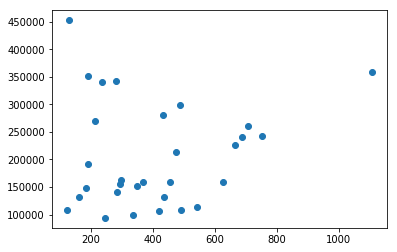

In [4]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [5]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [6]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[57.05712426]]
y-axis intercept:  [183636.17896499]


In [8]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[123]]
Max X Value: [[1106]]


In [9]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Min Y Value: {y_min}")
print(f"Max Y Value: {y_max}")
### END SOLUTION

Min Y Value: [[190654.20524946]]
Max Y Value: [[246741.35840097]]


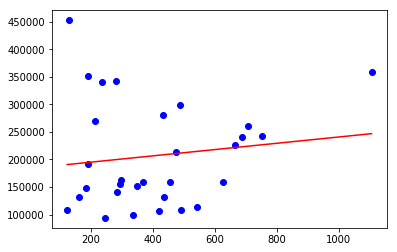

In [10]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION